In [1]:
%matplotlib inline
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
def heads_or_tails():
    """Randomly returns 'heads' or 'tails'."""
    flips = {0: 'heads', 1: 'tails'}
    flip = random.randint(0, 1)
    return flips[flip]

In [5]:
def flip_coins(flips=(2**16)):
    flip_log = []
    totals = {'heads': 0, 'tails': 0}
    change_format = {'heads': 0, 'tails': 1}
    diffs = []
    ratios = []
    means = []
    std_devs = []
    for i in range(flips):
        flip = heads_or_tails()
        flip_log.append(change_format[flip])
        totals[flip] += 1
        heads = totals['heads']
        tails = totals['tails']
        diffs.append(heads - tails)
        ratios.append([heads, tails])
        means.append((heads - tails) / (heads + tails))
        std_devs.append(np.std(flip_log))
    
    return {'flip_log': flip_log, 'totals': totals, 'diffs': diffs, 
            'ratios': ratios, 'means': means, 'std_devs': std_devs}


In [6]:
num_flips = 2**16
flips = flip_coins(num_flips)


### Difference Graphs
These look as expected, with the difference hovering relatively close to 0.  

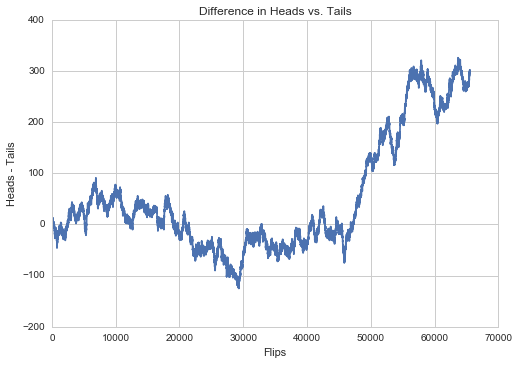

In [7]:
##Difference Graph
plt.plot(flips['diffs'])
plt.xlabel('Flips')
plt.ylabel('Heads - Tails')
plt.title('Difference in Heads vs. Tails')
plt.show()

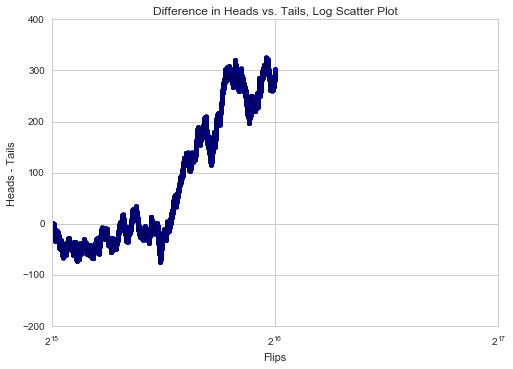

In [37]:
#Difference: Log Scatter Plot
plt.scatter(range(2**16), flips['diffs'])
plt.xscale('log', basex=2)
plt.xlabel('Flips')
plt.ylabel('Heads - Tails')
#plt.xlim(0,2**16)
plt.title('Difference in Heads vs. Tails, Log Scatter Plot')
plt.show()

### Mean/Ratio Graphs
These look as expected, with the difference hovering relatively close to 0.  

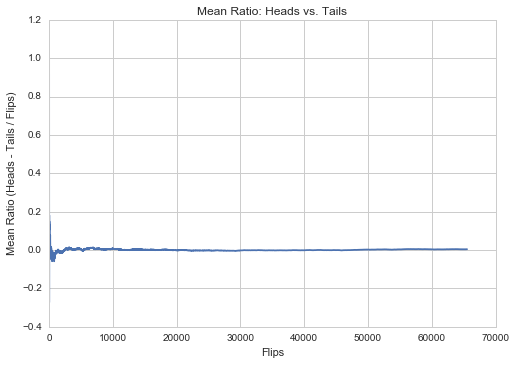

In [38]:
#Mean/Ratio
plt.plot(flips['means'])
plt.xlabel('Flips')
plt.ylabel('Mean Ratio (Heads - Tails / Flips)')
plt.title('Mean Ratio: Heads vs. Tails')
plt.show()

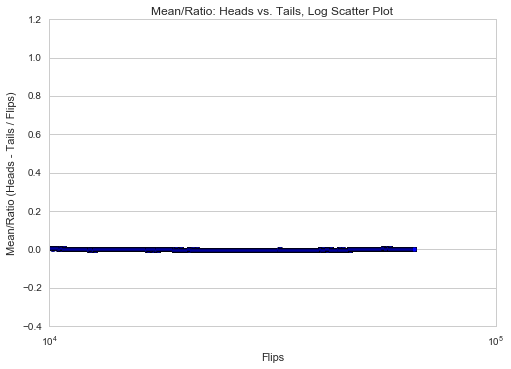

In [39]:
#Mean/Ratio: Log Scatter

plt.scatter([range(num_flips)], flips['means'])
plt.xlabel('Flips')
plt.xscale('log')
plt.ylabel('Mean/Ratio (Heads - Tails / Flips)')
plt.title('Mean/Ratio: Heads vs. Tails, Log Scatter Plot')
plt.show()

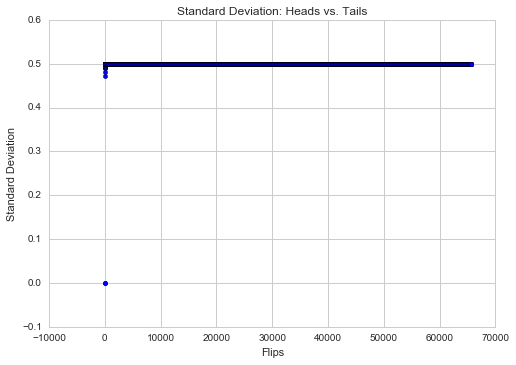

In [40]:
#Standard Deviation
plt.scatter(range(num_flips), flips['std_devs'])
plt.xlabel('Flips')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation: Heads vs. Tails')
plt.show()

In [41]:
trials = [[1,2,1,0,-1,0]
    
]

def flip_coins_mult_trials(flips=(2**16)):
    trials_means = []
    trials_std = []
    for _ in range (20):
        
        flip_log = []
        totals = {'heads': 0, 'tails': 0}
        change_format = {'heads': 0, 'tails': 1}
        means = []

        std_devs = []
        for i in range(flips):
            flip = heads_or_tails()
            flip_log.append(change_format[flip])
            totals[flip] += 1
            heads = totals['heads']
            tails = totals['tails']
            means.append((heads - tails) / (heads + tails))
            std_devs.append(np.std(flip_log))
            
        trials_means.append(means)
        trials_std.append(std_devs)
    return (trials_means, trials_std)

In [42]:
mult_trials = flip_coins_mult_trials(10)
#test = [[1,2,3],[1,2,3],[1,2,3]]
#print(list(zip(*test)))
#print([np.mean(a) for a in list(zip(*test))])

mean_of_means = [np.mean(mean_list) for mean_list in list(zip(*mult_trials[0]))]
std_of_stds = [np.std(std_list) for std_list in list(zip(*mult_trials[1]))]


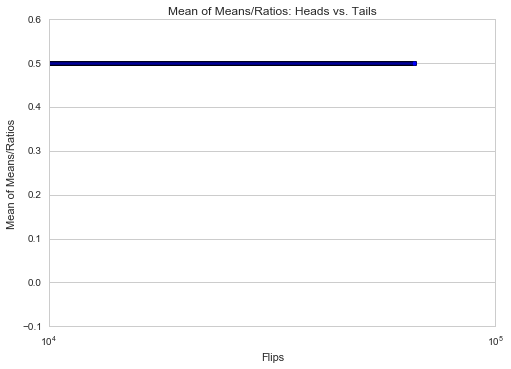

In [43]:
#Mean of Means/Ratios for 20 trials
plt.scatter(range(num_flips), flips['std_devs'])
plt.xlabel('Flips')
plt.xscale('log')
plt.ylabel('Mean of Means/Ratios')
plt.title('Mean of Means/Ratios: Heads vs. Tails')
plt.show()

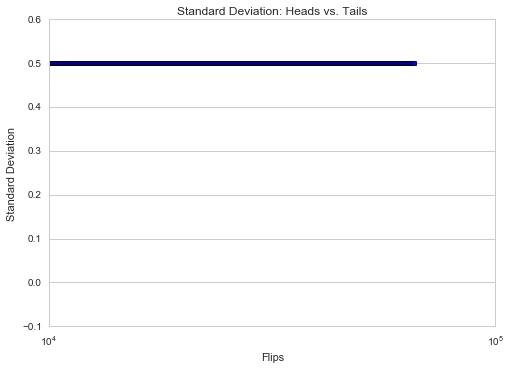

In [44]:
#Standard Deviation of Standard Deviations for 20 trials
plt.scatter(range(num_flips), flips['std_devs'])
plt.xlabel('Flips')
plt.xscale('log')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation: Heads vs. Tails')
plt.show()

In [45]:
def head_count_trials(num_trials, num_flips):
    data = []
    for l in range(num_trials):
        heads = 0
        for m in range(num_flips):
            heads += random.randint(0,1)
        data.append(heads / num_flips)
    return data

In [46]:
print(head_count_trials(10, 100))


[0.38, 0.45, 0.48, 0.55, 0.5, 0.53, 0.5, 0.53, 0.46, 0.49]


In [ ]:
hist_data_100k_of_100 = head_count_trials(100000, 100)

    
# plt.hist(hist_data_100k_of_100)
# ymin, ymax = plt.ylim()
# plt.show()

In [ ]:
hist_data_100k_of_1000 = head_count_trials(100000, 1000)

In [ ]:
#100,000 trials of 100 coin flips each. 

plt.hist(hist_data_100k_of_100, bins=np.arange(0.3,0.7,0.01))
plt.xlabel('Ratio of Heads/Total Flips')
plt.ylabel('Number of Trials')
plt.title('Ratio of Heads to Total Flips')
plt.show()


In [ ]:
#100,000 trials of 100 coin flips each. 

plt.hist(hist_data_100k_of_1000, bins=np.arange(0.3,0.7,0.01))
plt.xlabel('Ratio of Heads/Total Flips')
plt.ylabel('Number of Trials')
plt.title('Ratio of Heads to Total Flips')
plt.show()


In [ ]:
"""Lastly, plot a box plot of your results from both the 100 coin flip 
trials and your results from the 1,000 coin flip trials."""


ticks = ['100', '1000']
plt.boxplot([hist_data_100k_of_100, hist_data_100k_of_1000])
plt.xticks(range(1,3), ticks)
plt.xlabel('100,000 trials of ___ coin flips')
plt.ylabel('Ratio of Heads/Total Flips')
plt.title('Ratio of Heads to Total Flips')
plt.show()
